In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

In [3]:
#数据预处理
dataset=pd.read_csv('/Users/gongchen/Desktop/Matrix_Final/dataset_sh.csv',index_col=0)
dataset

,确诊,无症状感染,无症状转确诊
日期,,,
28,96,4381,21
29,326,5656,18
30,355,5298,16
31,358,4144,20
1,260,6051,2
2,438,7788,73
3,425,8581,1
4,268,13086,4
5,311,16766,40


In [4]:
dataset['每日新增阳性病例数']=dataset['确诊']+dataset['无症状感染']-dataset['无症状转确诊']
dataset

,确诊,无症状感染,无症状转确诊,每日新增阳性病例数
日期,,,,
28,96,4381,21,4456
29,326,5656,18,5964
30,355,5298,16,5637
31,358,4144,20,4482
1,260,6051,2,6309
2,438,7788,73,8153
3,425,8581,1,9005
4,268,13086,4,13350
5,311,16766,40,17037


In [5]:
#dataset.to_csv('/Users/gongchen/Desktop/Matrix_Final/newdataset.csv')

In [6]:
y=np.array(dataset['每日新增阳性病例数'])
y

array([ 4456,  5964,  5637,  4482,  6309,  8153,  9005, 13350, 17037,
       19967, 20899, 23204, 24752, 26040, 23069, 26307, 27605, 22765,
       22591, 23643, 21395, 19442, 18368, 18036, 17486, 22250])

In [7]:
x=np.array(range(1,27))
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

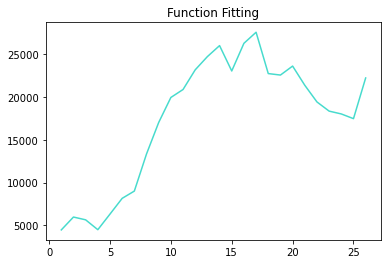

In [8]:
plt.plot(x,y,'#47DBCD')
plt.title('Function Fitting')
plt.show()

In [9]:
def func(x,a,b,c):
    return a*np.exp(-(x-b)**2/c)#高斯拟合
popt,pcov=curve_fit(func,x,y,maxfev = 10000)
popt

array([2.56508398e+04, 1.72871121e+01, 1.40046867e+02])

In [18]:
y3=func(27,popt[0],popt[1],popt[2])
print('4.23上海新增阳性病例数(预测)：%d人'%y3)
y4=func(28,popt[0],popt[1],popt[2])
print('4.24上海新增阳性病例数(预测)：%d人'%y4)
y5=func(29,popt[0],popt[1],popt[2])
print('4.25上海新增阳性病例数(预测)：%d人'%y5)

4.23上海新增阳性病例数(预测)：13078人
4.24上海新增阳性病例数(预测)：11303人
4.25上海新增阳性病例数(预测)：9630人


In [29]:
y6=func(17,popt[0],popt[1],popt[2])
y6

25635.745807839132

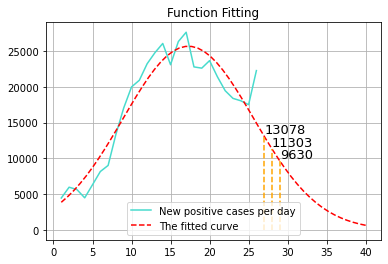

In [28]:
y2=[func(i,popt[0],popt[1],popt[2])for i in np.linspace(1,40,50)]
#补充：linspace(x1,x2,n)在指定的范围(x1到x2)内返回1个数组(这里的数组指ndarray数组)，这个数组包含了n个均匀间隔的样本。换句话说每个数之间的间隔为 (x2-x1)/(n-1)，即是一个等差数列
plt.plot(x,y,'#47DBCD')
plt.title('Function Fitting')
plt.plot(np.linspace(1,40,50),y2,'r--')
plt.vlines(27,0,y3,'orange','--')
plt.vlines(28,0,y4,'orange','--')
plt.vlines(29,0,y5,'orange','--')
plt.text(27, y3+0.1, int(y3), ha='left', va='bottom', fontsize=13)
plt.text(28, y4+0.1, int(y4), ha='left', va='bottom', fontsize=13)
plt.text(29, y5+0.1, int(y5), ha='left', va='bottom', fontsize=13)
plt.legend(labels=['New positive cases per day','The fitted curve'])
plt.grid()
plt.show()

In [12]:
#拟合精确度分析
from sklearn.metrics import r2_score
score=r2_score(y,y2[:26])
print('拟合结果的决定系数R^2：',score)

拟合结果的决定系数R^2： 0.6848869146022499
